In [101]:
import pandas as pd
import numpy as np


df = pd.read_csv("data/train_lenta.csv")
df.shape

(714510, 195)

## EDA

In [102]:
df.head()

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,treatment
0,81.0,9.0,14.0,12.0,7.0,19.0,8.0,4.0,18.0,9.0,...,0.00,314.91,1045.57,134.36,0.00,0.0,0.0,0.0000,0,1
1,56.0,17.0,13.0,24.0,14.0,3.0,2.0,2.0,13.0,13.0,...,582.83,3489.72,119.52,1031.92,218.12,0.0,NaN,0.1608,0,0
2,63.0,0.0,0.0,0.0,0.0,9.0,2.0,8.0,0.0,2.0,...,93.67,0.00,424.98,0.00,0.00,0.0,0.0,0.0000,0,1
3,56.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,...,34.89,0.00,109.90,81.99,77.38,0.0,0.0,0.0000,0,0
4,47.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,...,0.00,0.00,209.14,241.50,89.99,0.0,0.0,0.0000,0,1


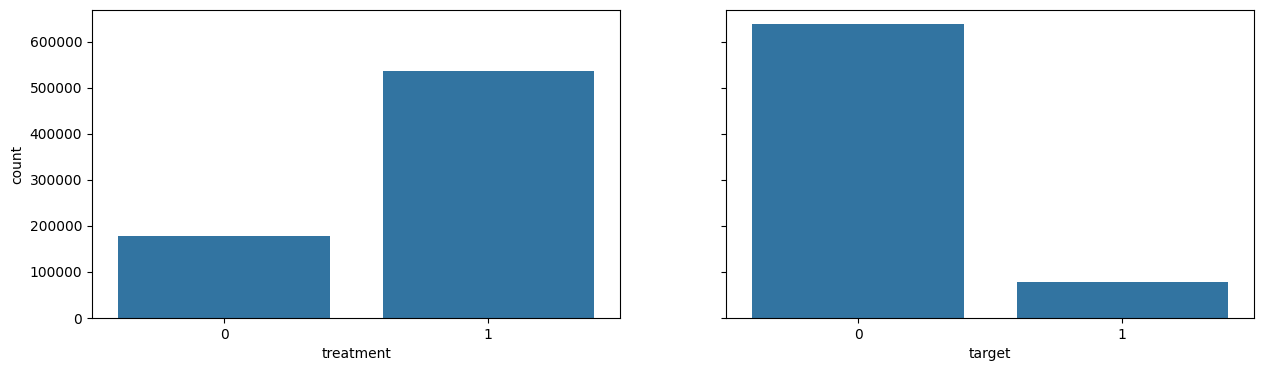

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,4))

treatment = df["treatment"]
target = df["target"]

sns.countplot(x=treatment, ax=ax[0])
sns.countplot(x=target, ax=ax[1])
plt.show()

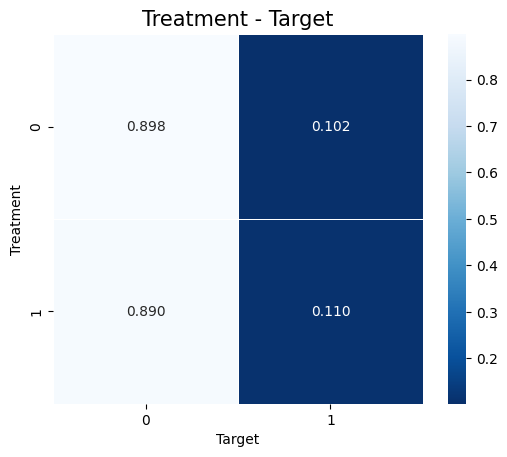

In [104]:
def crosstab_plot(treatment, target):
    ct = pd.crosstab(treatment, target, normalize='index')

    sns.heatmap(ct, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Treatment')
    plt.xlabel('Target')
    plt.title("Treatment - Target", size = 15)

crosstab_plot(df.treatment, df.target)

### NANs

In [105]:
missing_cols_df = pd.DataFrame({"Total" : df.isna().sum().sort_values(ascending = False),
                                "Percentage" : round(df.isna().sum().sort_values(ascending = False) / len(df), 3)})

missing_cols_df.head()

,Total,Percentage
k_var_sku_price_15d_g49,515749,0.722
k_var_disc_share_15d_g49,515643,0.722
k_var_count_per_cheque_15d_g34,486931,0.681
k_var_sku_price_15d_g34,486931,0.681
k_var_disc_share_15d_g34,486846,0.681


It's better just to fill nans as zeros, as score proves it

In [106]:
df.fillna(0, inplace=True)

### Checking features

In [107]:
df[[col for col in df.columns if col[:6] != 'cheque']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714510 entries, 0 to 714509
Columns: 151 entries, age to treatment
dtypes: float64(148), int64(3)
memory usage: 823.1 MB


#### Age

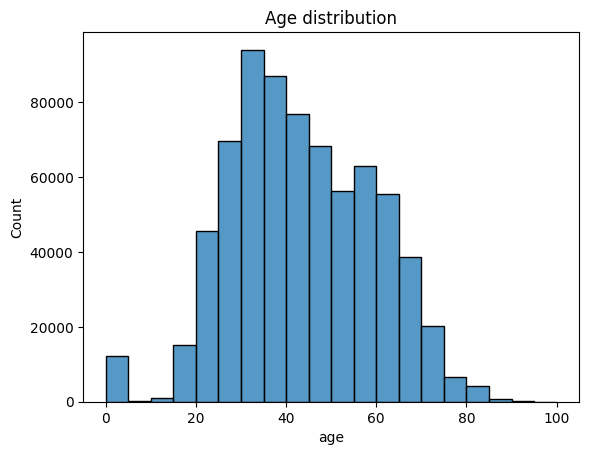

In [108]:
sns.histplot(x=df['age'], bins=20).set_title('Age distribution')
plt.show()

Seems like without outliers and pretty normal distribution

In [109]:
df['age'].min(), df['age'].max()

(0.0, 100.0)

Some outliers however there are

In [110]:
df[df['age'] > 90]

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,treatment
14498,99.0,4.0,9.0,0.0,13.0,6.0,8.0,5.0,19.0,10.0,...,26.49,1392.40,559.76,653.69,3358.99,0.0000,0.0000,0.1839,0,1
22596,100.0,0.0,3.0,1.0,8.0,15.0,7.0,1.0,9.0,9.0,...,692.55,231.69,2910.78,707.99,339.99,1.5275,0.2176,0.1959,0,1
22885,91.0,5.0,4.0,6.0,5.0,7.0,7.0,9.0,13.0,6.0,...,392.69,813.78,3096.74,1201.88,373.84,0.0000,0.0000,0.2464,0,1
24110,92.0,0.0,0.0,10.0,5.0,19.0,14.0,3.0,3.0,4.0,...,1176.71,1690.69,3449.20,0.00,1328.97,0.0000,0.1677,0.1677,0,1
40713,92.0,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,...,28.99,159.98,0.00,0.00,31.89,0.0000,0.0000,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676399,92.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.00,0.00,239.21,101.98,0.00,0.0000,0.0000,0.0017,0,1
678782,91.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,9.0,1.0,...,0.00,0.00,0.00,70.76,0.00,0.0000,0.0000,0.0000,0,1
697789,96.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,...,66.38,763.43,0.00,79.76,64.99,0.0000,0.2330,0.2330,0,1
700042,92.0,7.0,5.0,20.0,5.0,11.0,15.0,4.0,13.0,5.0,...,1597.76,397.44,1423.24,894.98,1007.58,0.0000,0.0000,0.1503,0,1


In [111]:
df[df['age'] < 10]

,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,cheque_count_12m_g42,...,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m,target,treatment
160,0.0,3.0,2.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.00,50.78,0.00,11.23,0.00,0.0,0.0000,0.0000,0,1
187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.00,449.54,0.00,310.32,0.00,0.0,0.0000,0.0000,1,1
233,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,4.0,...,148.98,239.37,0.00,41.99,0.00,0.0,0.4846,0.4846,0,1
240,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2404.75,0.00,0.00,331.54,0.00,0.0,0.0000,0.0000,0,1
255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.00,0.00,444.79,282.36,0.00,0.0,0.3166,0.3166,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,41.99,0.0,0.0000,0.0000,0,1
714196,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,0.0,0.0,...,0.00,0.00,0.00,318.00,0.00,0.0,0.1089,0.1089,0,1
714226,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,92.27,0.00,0.00,0.00,105.67,0.0,0.0000,0.0000,0,0
714237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,162.16,0.0,0.0000,0.0000,0,1


Let's ignore it for now

In [112]:
df['age'].describe()

count    714510.000000
mean         43.006847
std          15.770129
min           0.000000
25%          31.000000
50%          42.000000
75%          55.000000
max         100.000000
Name: age, dtype: float64

#### Children

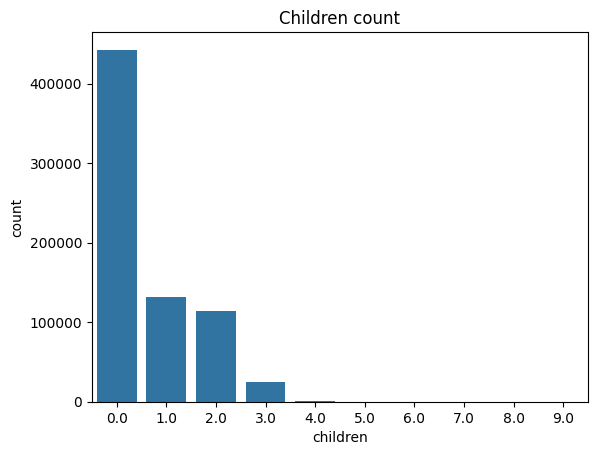

In [113]:
sns.countplot(x=df['children']).set_title('Children count')
plt.show()

In [114]:
df['children'].describe()

count    714510.000000
mean          0.615034
std           0.885575
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: children, dtype: float64

## Data Split

In [117]:
from sklearn.model_selection import train_test_split

stratify_cols = pd.concat([df.treatment, df.target], axis=1)

df_train, df_val, treat_train, treat_val, y_train, y_val = train_test_split(
    df.drop(['treatment', 'target'], axis=1),
    df.treatment,
    df.target,
    test_size=0.2,
    random_state=59,
    stratify=stratify_cols
)

print(f"Train shape: {df_train.shape}")
print(f"Validation shape: {df_val.shape}")

Train shape: (571608, 193)
Validation shape: (142902, 193)


## Feature generation

We can already generate a good feature, that is maturity, person is mature if he/she is older than 18 and not otherwise

In [118]:
df_train['maturity'] = df_train['age'].apply(lambda x: x >= 18)
df_val['maturity'] = df_val['age'].apply(lambda x: x >= 18)

df_train['maturity'].value_counts(normalize=True), df_val['maturity'].value_counts(normalize=True)

(maturity
 True     0.975434
 False    0.024566
 Name: proportion, dtype: float64,
 maturity
 True     0.974689
 False    0.025311
 Name: proportion, dtype: float64)

Let's try generate features by multiplying pairwise top 10 important features

In [150]:
top_10_features = set([
    'stdev_days_between_visits_15d', 'k_var_days_between_visits_15d',
    'perdelta_days_between_visits_15_30d', 'k_var_days_between_visits_1m',
    'k_var_disc_per_cheque_15d', 'cheque_count_6m_g40',
    'k_var_cheque_group_width_15d', 'k_var_cheque_category_width_15d',
    'k_var_discount_depth_15d', 'food_share_15d'
])

for feature_name in top_10_features:
    for second_feature in top_10_features:
        df_train[feature_name + '_' + second_feature] = df_train[feature_name] * df_train[second_feature]
        df_val[feature_name + '_' + second_feature] = df_val[feature_name] * df_val[second_feature]

C:\Users\hello\AppData\Local\Temp\ipykernel_14664\132059465.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train[feature_name + '_' + second_feature] = df_train[feature_name] * df_train[second_feature]
C:\Users\hello\AppData\Local\Temp\ipykernel_14664\132059465.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_val[feature_name + '_' + second_feature] = df_val[feature_name] * df_val[second_feature]
C:\Users\hello\AppData\Local\Temp\ipykernel_14664\132059465.py:11: PerformanceWarning: DataFrame is highly fragmented.

In [151]:
df_train.shape

(571608, 294)

## Baseline (catboost with default params)

Lets write code for the `Two Model` approach or `T-learner`

In [152]:
from sklearn.base import clone, BaseEstimator


class TwoModelApproach(BaseEstimator):

    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, treatment, y, fit_params={}):
        # assume treatment is binary
        X_treatment = X.loc[treatment == 1].copy()
        y_treatment = pd.Series(y).loc[treatment == 1]
        X_control = X.loc[treatment == 0].copy()
        y_control = pd.Series(y).loc[treatment == 0]

        model_control = clone(self.estimator)
        model_control.fit(X_control, y_control, **fit_params)

        X_treatment.loc[:, 'control_feature'] = model_control.predict_proba(X_treatment)[:, 1]

        model_treatment = clone(self.estimator)
        model_treatment.fit(X_treatment, y_treatment, **fit_params)

        self.model_control = model_control
        self.model_treatment = model_treatment

    def predict_proba(self, X_test_original):
        pred_control_test = self.model_control.predict_proba(X_test_original)[:, 1]
        X_test = X_test_original.copy()
        X_test.loc[:, 'control_feature'] = pred_control_test
        pred_treatment_test = self.model_treatment.predict_proba(X_test)[:, 1]
        pred_uplift = pred_treatment_test - pred_control_test
        return pred_uplift

In [55]:
from catboost import CatBoostClassifier

catboost_estimator = CatBoostClassifier(random_state=59)

two_model = TwoModelApproach(estimator=catboost_estimator)
two_model.fit(df_train, treat_train, y_train)

Learning rate set to 0.085534
0:	learn: 0.6062945	total: 55.1ms	remaining: 55.1s
1:	learn: 0.5382255	total: 158ms	remaining: 1m 18s
2:	learn: 0.4840405	total: 210ms	remaining: 1m 9s
3:	learn: 0.4419006	total: 271ms	remaining: 1m 7s
4:	learn: 0.4092273	total: 323ms	remaining: 1m 4s
5:	learn: 0.3830187	total: 381ms	remaining: 1m 3s
6:	learn: 0.3625626	total: 433ms	remaining: 1m 1s
7:	learn: 0.3459443	total: 498ms	remaining: 1m 1s
8:	learn: 0.3326563	total: 551ms	remaining: 1m
9:	learn: 0.3221682	total: 610ms	remaining: 1m
10:	learn: 0.3138559	total: 671ms	remaining: 1m
11:	learn: 0.3066670	total: 729ms	remaining: 60s
12:	learn: 0.3009393	total: 783ms	remaining: 59.4s
13:	learn: 0.2966540	total: 828ms	remaining: 58.3s
14:	learn: 0.2932419	total: 867ms	remaining: 57s
15:	learn: 0.2904158	total: 915ms	remaining: 56.3s
16:	learn: 0.2874918	total: 970ms	remaining: 56.1s
17:	learn: 0.2852845	total: 1.02s	remaining: 55.4s
18:	learn: 0.2833384	total: 1.07s	remaining: 55.3s
19:	learn: 0.2814037	t

In [56]:
uplift_pred = two_model.predict_proba(df_val)
uplift_pred

array([ 0.02578799,  0.00457366,  0.00912661, ...,  0.01749027,
        0.02143409, -0.02088581])

In [57]:
from sklift.metrics import uplift_at_k

# Assuming y_true, uplift_pred, and treatment are your data
score = uplift_at_k(y_true=y_val, uplift=uplift_pred, treatment=treat_val, k=0.05, strategy='overall')
score

0.2126754405528342

## Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier(max_depth=17, random_state=59)

two_model = TwoModelApproach(estimator=rf_estimator)
two_model.fit(df_train, treat_train, y_train)

In [159]:
uplift_pred = two_model.predict_proba(df_val)
uplift_pred

array([-0.00353419,  0.00135831,  0.01874042, ...,  0.01048435,
        0.00643021,  0.00013019])

In [160]:
from sklift.metrics import uplift_at_k

# Assuming y_true, uplift_pred, and treatment are your data
score = uplift_at_k(y_true=y_val, uplift=uplift_pred, treatment=treat_val, k=0.05, strategy='overall')
score

0.5716574942131802

## Feature importance

In [156]:
def plot_feature_importance(importance, names, model_type, max_cols=15):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DataFrame using a Dictionary
    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    fi_df.reset_index(drop=True, inplace=True)

    print(fi_df[:10]['feature_names'].values)

    # Define size of bar plot
    plt.figure(figsize=(10, 8))

    # Plot Searborn bar chart
    sns.barplot(x=fi_df.loc[:max_cols, 'feature_importance'], y=fi_df.loc[:max_cols, 'feature_names'])

    # Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

['stdev_days_between_visits_15d_stdev_days_between_visits_15d'
 'cheque_count_6m_g40_k_var_days_between_visits_15d'
 'k_var_days_between_visits_1m_k_var_days_between_visits_15d'
 'food_share_15d_k_var_days_between_visits_15d'
 'k_var_days_between_visits_15d_cheque_count_6m_g40'
 'stdev_days_between_visits_15d_k_var_days_between_visits_15d'
 'k_var_disc_per_cheque_15d_k_var_days_between_visits_15d'
 'k_var_days_between_visits_15d_k_var_days_between_visits_15d'
 'perdelta_days_between_visits_15_30d_stdev_days_between_visits_15d'
 'k_var_days_between_visits_1m_stdev_days_between_visits_15d']


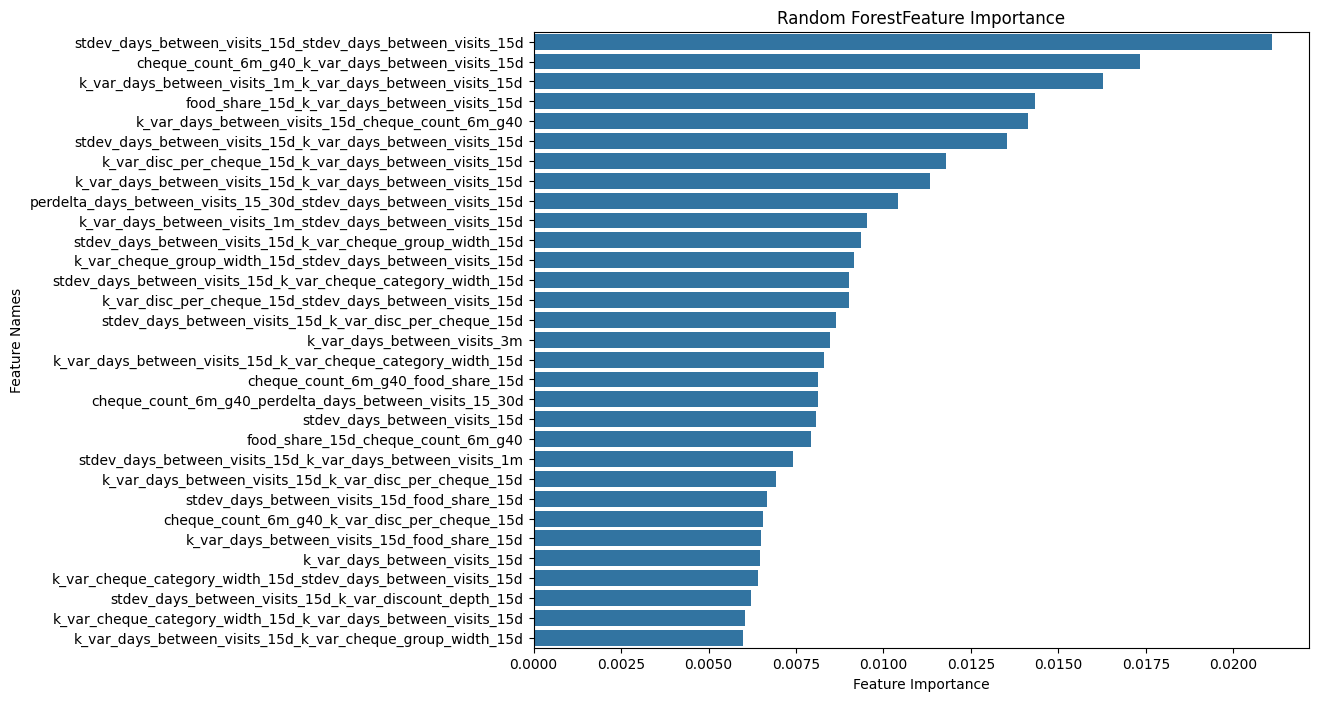

In [157]:
plot_feature_importance(
    two_model.model_control.feature_importances_,
    df_train.columns,
    'Random Forest',
    max_cols=30
)

## Predict for test and make submission

### Prediction

In [161]:
df_test = pd.read_csv("data/test_lenta.csv")
df_test.shape

(170297, 193)

In [162]:
df_test.isna().sum()

age                               2977
cheque_count_12m_g20                 0
cheque_count_12m_g21                 0
cheque_count_12m_g25                 0
cheque_count_12m_g32                 0
                                 ...  
sale_sum_6m_g44                    760
sale_sum_6m_g54                    760
stdev_days_between_visits_15d    19194
stdev_discount_depth_15d         34864
stdev_discount_depth_1m          34833
Length: 193, dtype: int64

In [163]:
df_test.fillna(0, inplace=True)
df_test.isna().sum().sum()

0

In [164]:
df_test['maturity'] = df_test['age'].apply(lambda x: x >= 18)
df_test['maturity'].value_counts(normalize=True)

maturity
True     0.974556
False    0.025444
Name: proportion, dtype: float64

In [165]:
for feature_name in top_10_features:
    for second_feature in top_10_features:
        df_test[feature_name + '_' + second_feature] = df_test[feature_name] * df_test[second_feature]

C:\Users\hello\AppData\Local\Temp\ipykernel_14664\1530986408.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[feature_name + '_' + second_feature] = df_test[feature_name] * df_test[second_feature]
C:\Users\hello\AppData\Local\Temp\ipykernel_14664\1530986408.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test[feature_name + '_' + second_feature] = df_test[feature_name] * df_test[second_feature]
C:\Users\hello\AppData\Local\Temp\ipykernel_14664\1530986408.py:3: PerformanceWarning: DataFrame is highly fragmented.

In [166]:
test_uplift_pred = two_model.predict_proba(df_test)
test_uplift_pred

array([ 0.00501783,  0.01003347, -0.01228545, ...,  0.00821074,
        0.00233074,  0.01978807])

### Submission

In [167]:
sample_sub_df = pd.read_csv("data/sample_submission.csv")
sample_sub_df.head()

,id,predicted_uplift
0,0,0.981304
1,1,0.444829
2,2,0.444000
3,3,-0.442873
4,4,-0.636638


In [168]:
sample_sub_df['predicted_uplift'] = test_uplift_pred
sample_sub_df.head()

,id,predicted_uplift
0,0,0.005018
1,1,0.010033
2,2,-0.012285
3,3,0.002781
4,4,0.001035


In [ ]:
sample_sub_df.to_csv("submissions/Generated_Poly_Important_RF_depth17.csv", index=False)